# A. Normalisation de données

In [1]:
import numpy as np
import sklearn.preprocessing as pr

In [2]:
# 1
X = np.array(([1,-1,2],[2,0,0],[0,1,-1]),np.float64)

In [3]:
# 2
print("X: \n",X)
print("Moyenne de X:",X.mean())
print("Variance de X:",X.var())

X: 
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Moyenne de X: 0.4444444444444444
Variance de X: 1.1358024691358024


In [4]:
# 3
X_scaled=pr.scale(X)
print(X_scaled)
print("On remarque que les valeurs de la matrice normalisée sont changée selon la formule: x=(x-moyenne(axis=0))/écart_type(axis=0)")

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
On remarque que les valeurs de la matrice normalisée sont changée selon la formule: x=(x-moyenne(axis=0))/écart_type(axis=0)


In [5]:
# 4
print("Moyenne de X_scaled:",X_scaled.mean())
print("Variance de X_scaled:",X_scaled.var())
print("On remarque que les données sont centrées autour de zéro avec une variance qui égal à 1")

Moyenne de X_scaled: 4.9343245538895844e-17
Variance de X_scaled: 1.0
On remarque que les données sont centrées autour de zéro avec une variance qui égal à 1


# B. Normalisation MinMax

In [6]:
# 1
X = np.array(([1.,-1.,2.],[2.,0.,0.],[0.,1.,-1.]))

In [7]:
# 2
print("X:\n",X)
print("Moyenne sur les variables :",X.mean(0))

X:
 [[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
Moyenne sur les variables : [1.         0.         0.33333333]


In [8]:
# 3
scaler = pr.MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
print("X_scaled =\n",X_scaled)
print("La moyenne sur les variables :",X_scaled.mean(0))
print("Les données sont centrée autour de 0.5")

X_scaled =
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
La moyenne sur les variables : [0.5        0.5        0.44444444]
Les données sont centrée autour de 0.5


# C. visualisation de données

In [9]:
# 1
from sklearn import datasets
iris = datasets.load_iris()

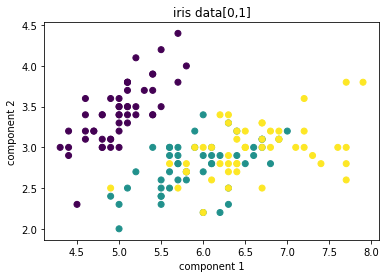

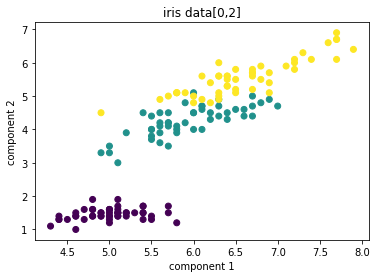

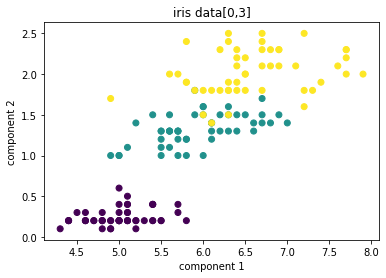

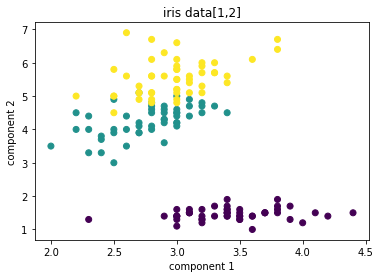

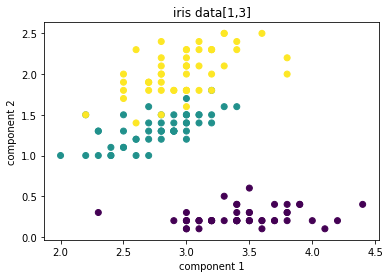

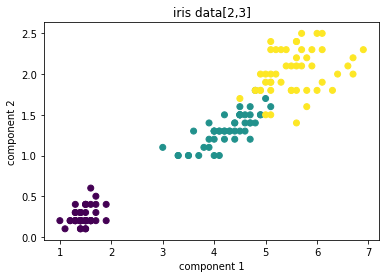

La meilleure visualisation est la dernière combinaison car les données sont bien regroupées pour chaque classe et les classes sont mieux séparées.


In [10]:
# 2
%matplotlib inline
import matplotlib.pyplot as plt

def draw(X,Y,i,j,title):
    plt.figure()
    plt.scatter(X[:,i],X[:,j],c=Y)
    plt.xlabel("component 1")
    plt.ylabel("component 2")
    plt.title(title)
    plt.show()
    
for i in range(4):
    for j in range(4):
        if(j>i):
            draw(iris.data,iris.target,i,j,"iris data["+str(i)+","+str(j)+"]")            
print("La meilleure visualisation est la dernière combinaison car les données sont bien regroupées pour chaque classe et les classes sont mieux séparées.")

# D. Réduction de dimensions et visualisation de données

In [11]:
# 1
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
# 2
help(PCA)
help(LDA)

x=iris.data
y=iris.target

clf = PCA()
IrisPCA = clf.fit(x).transform(x)
print(IrisPCA)

clf = LDA()
IrisLDA = clf.fit(x,y).transform(x)
print(IrisLDA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Param

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]
 [-2.28085963e+00  7.41330449e-01  1.68677658e-01  2.42008576e-02]
 [-2.82053775e+00 -8.94613845e-02  2.57892158e-01  4.81431065e-02]
 [-2.62614497e+00  1.63384960e-01 -2.18793179e-02  4.52978706e-02]
 [-2.88638273e+00 -5.78311754e-01  2.07595703e-02  2.67447358e-02]
 [-2.67275580e+00 -1.13774246e-01 -1.97632725e-01  5.62954013e-02]
 [-2.50694709e+00  6.45068899e-01 -7.53180094e-02  1.50199245e-02]
 [-2.61275523e+00  1.47299392e-02  1.02150260e-01  1.56379208e-01]
 [-2.78610927e+00 -2.35112000e-01 -2.06844430e-01  7.88791149e-03]
 [-3.22380374e+00 -5.11394587e-01  6.12996725e-02  2.16798118e-02]
 [-2.64475039e+00  1.17876464e+00 -1.51627524e-01 -1.59209718e

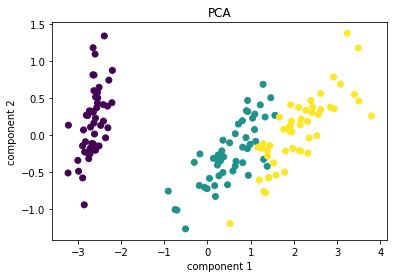

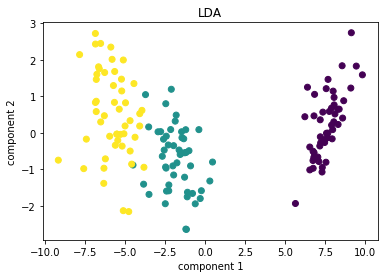

In [13]:
# 3
draw(IrisPCA,y,0,1,"PCA")
draw(IrisLDA,y,0,1,"LDA")